In [5]:
from torch.utils.data import DataLoader
from warnings import simplefilter
import matplotlib.pyplot as plt
from dataloader import *
from Trainer import *
import pandas as pd
import numpy as np
from ANN_Models import *
import seaborn as sns
import torch

simplefilter(action='ignore', category=pd.errors.ParserWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)

In [6]:
store_loss = np.genfromtxt("store_loss.csv", delimiter=',')

In [7]:
store_loss

array([[0.00228333, 0.00747936, 0.01655008, 0.03130289, 0.05035714,
        0.06754846, 0.07778143, 0.0965463 , 0.10074139, 0.09481718,
        0.100682  , 0.10185964, 0.09869946, 0.10699126, 0.12015438],
       [0.00030635, 0.00242518, 0.00255195, 0.00394369, 0.00428804,
        0.00429755, 0.00500161, 0.00508176, 0.00384912, 0.00497591,
        0.00495128, 0.00654885, 0.00784403, 0.00907845, 0.00766387],
       [0.00044707, 0.00047819, 0.0005718 , 0.00053133, 0.00058441,
        0.00054181, 0.00054468, 0.00056781, 0.00052196, 0.00054531,
        0.00050301, 0.00060912, 0.00052943, 0.00053965, 0.00062726],
       [0.00046871, 0.00081503, 0.00155729, 0.00189935, 0.00140544,
        0.00152559, 0.00155152, 0.00131105, 0.00146754, 0.00127036,
        0.00151534, 0.00133922, 0.00127264, 0.00135135, 0.00136113],
       [0.00047787, 0.00098353, 0.00300017, 0.00339159, 0.0023566 ,
        0.00169652, 0.00255382, 0.00288168, 0.00258365, 0.0024342 ,
        0.00277669, 0.00252918, 0.00237855, 

In [8]:
# Used to check what the best na, nb values would be to train on
# lowest_loss = 100
# for na in range(15,16):
#     for nb in range(1,9):
#         print(na, nb)
#         data = DATA(na, nb) 
#         Xtrain, Ytrain = data.Xtrain, data.Ytrain
#         Xval, Yval = data.Xval, data.Yval

#         # Load data and set them up correctly for dataloader
#         Dataset_train, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.9, 0.1])
#         Dataset_val = CustomDataset(Xval.to_numpy(), Yval.to_numpy())
#         #Dataset_test = CustomDataset(data.testsub.u.to_numpy(), data.testsub.th.to_numpy())

#         dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
#         dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=False)
#         dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)
#         model = NARX(5)

#         train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NARX')

#         loss = train_module.fit(epochs=10, batch_size=32, save_log=False)
#         if loss < lowest_loss:
#             lowest_loss = loss
#             best_na = na
#             best_nb = nb
#         store_loss[na, nb-1] = loss

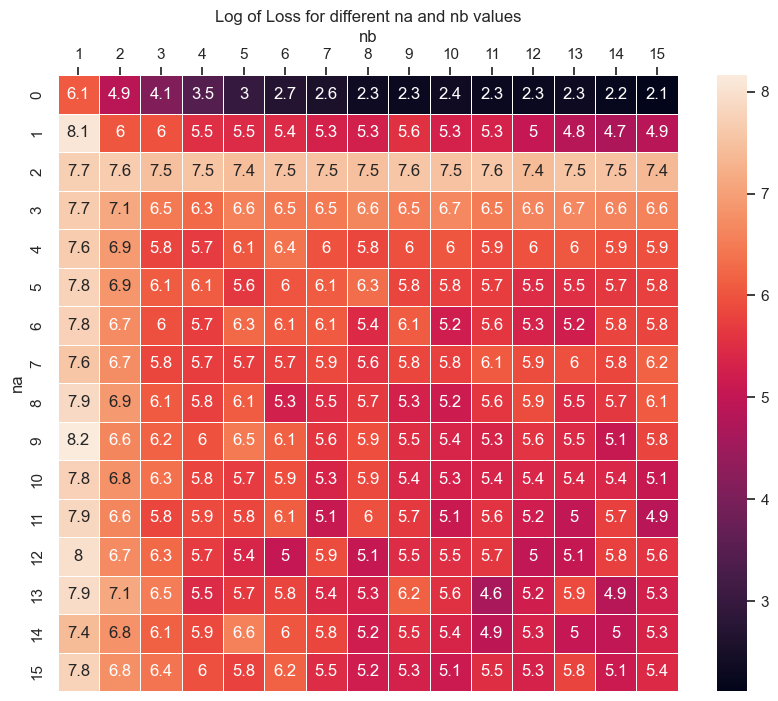

In [13]:
sns.set(rc={'figure.figsize': (10, 8)})
ax = sns.heatmap(-np.log(store_loss), annot=True, linewidths=.5)
ax.set(xlabel='nb', ylabel='na')
ax.set_xticklabels(np.arange(1, 16))
ax.set_title('Log of Loss for different na and nb values')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')


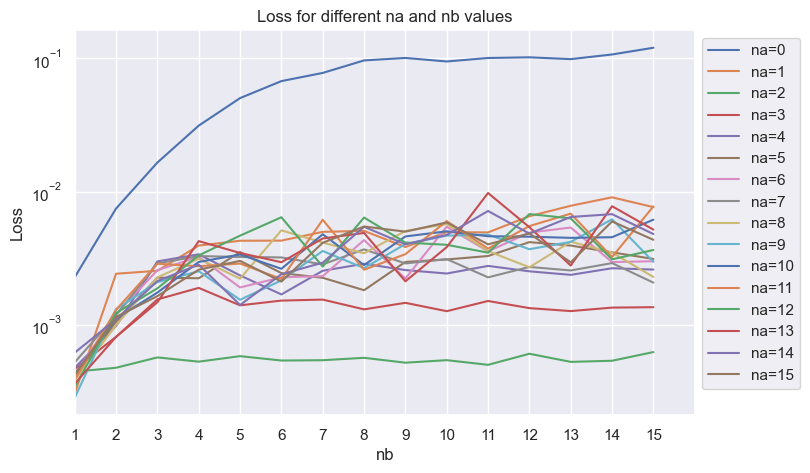

In [7]:
sns.set(rc={'figure.figsize': (8, 5)})
x = np.arange(1, 16)
sns.lineplot(x=x, y=store_loss[0, :], label='na=0')
sns.lineplot(x=x, y=store_loss[1, :], label='na=1')
sns.lineplot(x=x, y=store_loss[2, :], label='na=2')
sns.lineplot(x=x, y=store_loss[3, :], label='na=3')
sns.lineplot(x=x, y=store_loss[4, :], label='na=4')
sns.lineplot(x=x, y=store_loss[5, :], label='na=5')
sns.lineplot(x=x, y=store_loss[6, :], label='na=6')
sns.lineplot(x=x, y=store_loss[7, :], label='na=7')
sns.lineplot(x=x, y=store_loss[8, :], label='na=8')
sns.lineplot(x=x, y=store_loss[9, :], label='na=9')
sns.lineplot(x=x, y=store_loss[10, :], label='na=10')
sns.lineplot(x=x, y=store_loss[11, :], label='na=11')
sns.lineplot(x=x, y=store_loss[12, :], label='na=12')
sns.lineplot(x=x, y=store_loss[13, :], label='na=13')
sns.lineplot(x=x, y=store_loss[14, :], label='na=14')
sns.lineplot(x=x, y=store_loss[15, :], label='na=15')
plt.yscale('log')
plt.xlabel('nb')
plt.ylabel('Loss')
plt.title('Loss for different na and nb values')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(1, 16))
plt.xlim(1, 16)
plt.show()

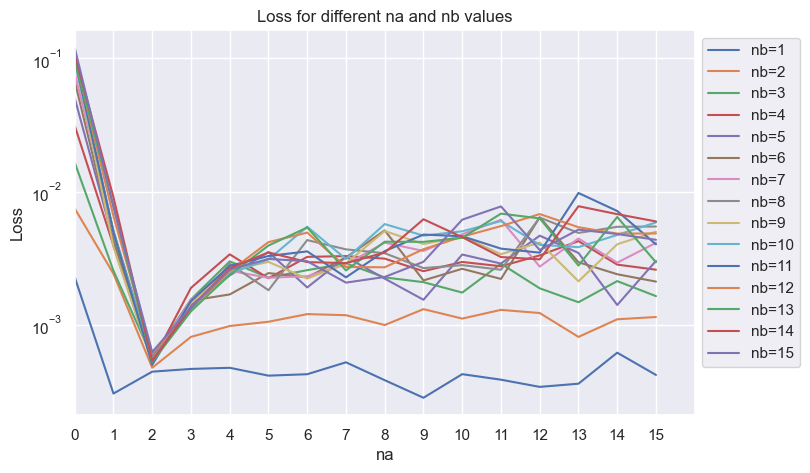

In [8]:
x = np.arange(0, 16)
sns.lineplot(x=x, y=store_loss[:, 0], label='nb=1')
sns.lineplot(x=x, y=store_loss[:, 1], label='nb=2')
sns.lineplot(x=x, y=store_loss[:, 2], label='nb=3')
sns.lineplot(x=x, y=store_loss[:, 3], label='nb=4')
sns.lineplot(x=x, y=store_loss[:, 4], label='nb=5')
sns.lineplot(x=x, y=store_loss[:, 5], label='nb=6')
sns.lineplot(x=x, y=store_loss[:, 6], label='nb=7')
sns.lineplot(x=x, y=store_loss[:, 7], label='nb=8')
sns.lineplot(x=x, y=store_loss[:, 8], label='nb=9')
sns.lineplot(x=x, y=store_loss[:, 9], label='nb=10')
sns.lineplot(x=x, y=store_loss[:, 10], label='nb=11')
sns.lineplot(x=x, y=store_loss[:, 11], label='nb=12')
sns.lineplot(x=x, y=store_loss[:, 12], label='nb=13')
sns.lineplot(x=x, y=store_loss[:, 13], label='nb=14')
sns.lineplot(x=x, y=store_loss[:, 14], label='nb=15')
plt.xlabel('na')
plt.ylabel('Loss')
plt.title('Loss for different na and nb values')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(0, 16))
plt.xlim(0, 16)
plt.yscale('log')
plt.show()


From this we can say that the optimal lies with nb = 1, and na 9, while the other plot suggest that na = 2, nb 1 be optimal. For this reason it was decided to use na=2, nb 1.

## Optimize size of network

In [9]:
store_loss2_depth = np.genfromtxt("store_loss2.csv", delimiter=',')

In [10]:
# data = DATA(2, 1) 
# Xtrain, Ytrain = data.Xtrain, data.Ytrain
# Xval, Yval = data.Xval, data.Yval

# # Load data and set them up correctly for dataloader
# Dataset_train, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.9, 0.1])
# Dataset_val = CustomDataset(Xval.to_numpy(), Yval.to_numpy())
# #Dataset_test = CustomDataset(data.testsub.u.to_numpy(), data.testsub.th.to_numpy())

# dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
# dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=False)
# dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)
# model = NARX(5)

# train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NARX')

# loss = train_module.fit(epochs=10, batch_size=32, save_log=False)
# store_loss2_depth[3] = loss

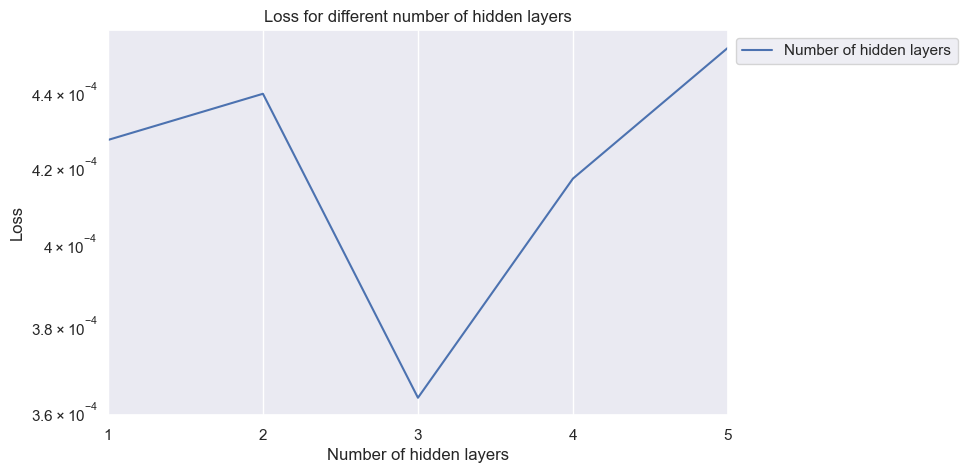

In [11]:
sns.lineplot(x=[1,2,3,4,5], y=store_loss2_depth, label='Number of hidden layers')
plt.ylabel('Loss')
plt.title('Loss for different number of hidden layers')
plt.xlabel('Number of hidden layers')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(1, 6))
plt.xlim(1, 5)
plt.yscale('log')


Since it seems that the number loss increases for layers after 4, I decide to use only 3

In [12]:
store_loss3_outfeatures = np.zeros(10)

In [13]:
store_loss3_outfeatures = np.genfromtxt("store_loss3.csv", delimiter=',')

In [14]:
# data = DATA(2, 1) 
# Xtrain, Ytrain = data.Xtrain, data.Ytrain
# Xval, Yval = data.Xval, data.Yval

# # Load data and set them up correctly for dataloader
# Dataset_train, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.9, 0.1])
# Dataset_val = CustomDataset(Xval.to_numpy(), Yval.to_numpy())
# #Dataset_test = CustomDataset(data.testsub.u.to_numpy(), data.testsub.th.to_numpy())

# dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
# dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=False)
# dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)

# for i in range(1,11):
#     model = NARX(i)

#     train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NARX')

#     loss = train_module.fit(epochs=10, batch_size=32, save_log=False)
#     store_loss3_outfeatures[i-1] = loss
#     np.savetxt("store_loss3.csv", store_loss3_outfeatures, delimiter=",")

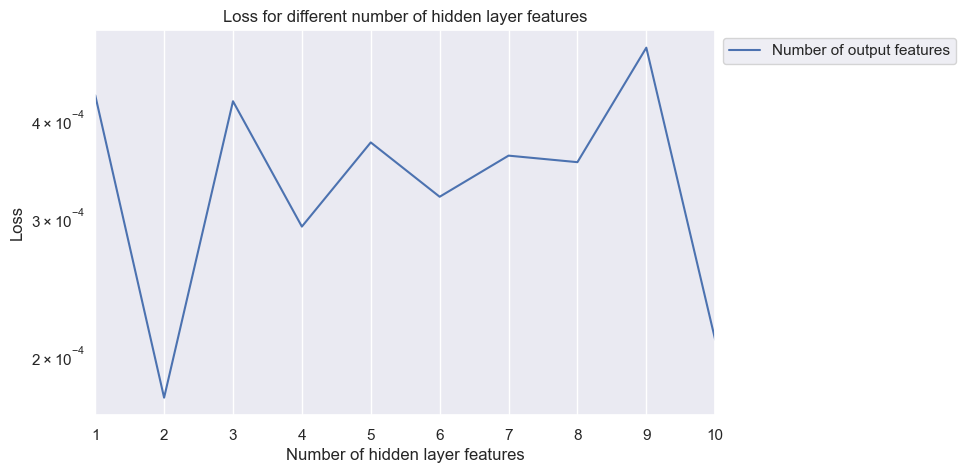

In [15]:
sns.lineplot(x=np.arange(1,11), y=store_loss3_outfeatures, label='Number of output features')
plt.ylabel('Loss')
plt.title('Loss for different number of hidden layer features')
plt.xlabel('Number of hidden layer features')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(np.arange(1, 11))
plt.xlim(1, 10)
plt.yscale('log')
plt.show()